# Guide for twinpy/analysis/twinboundary_analyzer.py

In [71]:
%aiida
%reload_ext autoreload
%autoreload 2

In [72]:
import os
import numpy as np
from pprint import pprint
from matplotlib import pyplot as plt
import twinpy
from twinpy.interfaces.aiida import (AiidaVaspWorkChain,
                                     AiidaRelaxWorkChain,
                                     AiidaPhonopyWorkChain,
                                     AiidaShearWorkChain,
                                     AiidaTwinBoudnaryRelaxWorkChain,
                                     )
from twinpy.analysis.twinboundary_analyzer import TwinBoundaryAnalyzer
from twinpy.file_io import write_thermal_ellipsoid

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

hexagonal_relax_pk = 7887  # twinpy
hexagonal_phonon_pk = 289856  # twinpy
twinboundary_pk = 186343  # twinpy
additional_relax_pks = [267977, 279276, 282215, 283951]   # twinpy
twinboundary_phonon_pk = 286877  # twinpy
twinboundary_shear_relax_pks = [297874, 297890, 297907, 297924]
twinboundary_shear_phonon_pks = [299318, 300184, 300580, 300760]
shear_strain_ratios = [0.02, 0.04, 0.06, 0.08]

# class TwinBoundaryAnalyzer

In [73]:
aiida_twinboundary_relax = AiidaTwinBoudnaryRelaxWorkChain(load_node(twinboundary_pk))
twinboundary_analyzer = aiida_twinboundary_relax.get_twinboundary_analyzer(
                            twinboundary_phonon_pk=twinboundary_phonon_pk,
                            hexagonal_relax_pk=hexagonal_relax_pk,
                            hexagonal_phonon_pk=hexagonal_phonon_pk,
                            additional_relax_pks=additional_relax_pks)
show_info(twinboundary_analyzer, is_class=True)

/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/base.py:105: UserWarning: process state: excepted
  warnings.warn("process state: %s" % self._process_state)
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:309: UserWarning: Final structure could not find.
process state:excepted (pk=279276)
  self.process_state, self._node.pk))
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:371: UserWarning: Could not find final static_pk calculation.
  warnings.warn("Could not find final static_pk calculation.")
/home/mizo/src/github.com/kei0822kei/twinpy/twinpy/interfaces/aiida/vasp.py:212: UserWarning: Final structure could not find.
process state:excepted (pk=281156)
  self.process_state, self._node.pk))


====== START class information ======

# ---------
# docstring
# ---------

    Analyze shear result.
    

# ----
# init
# ----

        Args:
            twinboundary_structure:TwinBoundaryStructure object.
            hexagonal_phonon_analyzer: PhononAnalyzer class object.
            twinboundary_phonon_analyzer: PhononAnalyzer class object.
        

# ---------------
# attribute names
# ---------------
['_twinboundary_structure',
 '_relax_analyzer',
 '_phonon_analyzer',
 '_hexagonal_relax_analyzer',
 '_hexagonal_phonon_analyzer',
 '_standardize']

# ------
# values
# ------
{'_hexagonal_phonon_analyzer': <twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7ff7e3733f90>,
 '_hexagonal_relax_analyzer': <twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7ff7e3733090>,
 '_phonon_analyzer': <twinpy.analysis.phonon_analyzer.PhononAnalyzer object at 0x7ff7e5090510>,
 '_relax_analyzer': <twinpy.analysis.relax_analyzer.RelaxAnalyzer object at 0x7ff7e227c990>,
 '_standardize'

## def get_formation_energy

In [74]:
show_info(twinboundary_analyzer.get_formation_energy)
print(twinboundary_analyzer.get_formation_energy())

====== START method information ======

# ---------
# docstring
# ---------

        Get formation energy. Unit [mJ/m^(-2)]

        Args:
            use_relax_lattice (bool): If True, relax lattice is used.
        

======= END method information =======


134.09398891226695


## def get_shear_cell

In [75]:
show_info(twinboundary_analyzer.get_shear_cell)
original_cells = []
for ratio in shear_strain_ratios:
    original_cell = twinboundary_analyzer.get_shear_cell(
        shear_strain_ratio=ratio,
        is_standardize=False)
    original_cells.append(original_cell)
original_cells[1]

====== START method information ======

# ---------
# docstring
# ---------

        Get shear introduced twinboundary cell.

        Args:
            shear_strain_ratio (float): shear strain ratio
            is_standardize (bool): if True, get standardized cell

        Returns:
            tuple: shear introduced cell

        Notes:
            original relax cell is use to create shear cell which is a little
            bit different shear value with respect to bulk shear value
            but I expect this is neglectable.
        

======= END method information =======




(array([[ 3.19290368e+00, -2.25468063e-09, -2.82290305e-16],
        [ 5.30689606e-09,  7.51521423e+00,  6.95899329e-48],
        [ 1.54269651e-10,  2.18459542e-01,  4.12338767e+01]]),
 array([[0.5       , 0.18987817, 0.        ],
        [0.5       , 0.77415617, 0.        ],
        [0.5       , 0.67037014, 0.09686977],
        [0.5       , 0.2565298 , 0.08491331],
        [0.        , 0.95006954, 0.05376716],
        [0.        , 0.49517744, 0.03823999],
        [0.5       , 0.13946881, 0.18920264],
        [0.5       , 0.72643571, 0.17437966],
        [0.        , 0.40759767, 0.14407153],
        [0.        , 0.98910516, 0.12922242],
        [0.5       , 0.60767731, 0.28013463],
        [0.5       , 0.19460888, 0.26528512],
        [0.        , 0.87366838, 0.23471488],
        [0.        , 0.46059995, 0.21986537],
        [0.5       , 0.0791721 , 0.37077758],
        [0.5       , 0.66067959, 0.35592847],
        [0.        , 0.34184155, 0.32562034],
        [0.        , 0.92880845, 

## def get_twinboudnary_shear_analyzer

In [76]:
show_info(twinboundary_analyzer.get_twinboundary_shear_analyzer)
phonon_analyzers = []
for i in range(len(original_cells)):
    aiida_relax = AiidaRelaxWorkChain(load_node(twinboundary_shear_relax_pks[i]))
    relax_analyzer = aiida_relax.get_relax_analyzer(original_cell=original_cells[i])
    aiida_phonon = AiidaPhonopyWorkChain(load_node(twinboundary_shear_phonon_pks[i]))
    phonon_analyzer = aiida_phonon.get_phonon_analyzer(relax_analyzer=relax_analyzer)
    phonon_analyzers.append(phonon_analyzer)

twinboundary_shear_analyzer = \
    twinboundary_analyzer.get_twinboundary_shear_analyzer(
        shear_phonon_analyzers=phonon_analyzers,
        shear_strain_ratios=shear_strain_ratios)
print(twinboundary_shear_analyzer)

====== START method information ======

# ---------
# docstring
# ---------

        Get TwinBoundaryShearAnalyzer class object.

        Args:
            shear_phonon_analyzers (list): List of additional shear
                                           phonon analyzers.
        

======= END method information =======




## def get_atomic_environment

In [77]:
show_info(twinboundary_analyzer.get_atomic_environment)
atomic_envs = twinboundary_analyzer.get_atomic_environment()
pprint(atomic_envs)

====== START method information ======

# ---------
# docstring
# ---------

        Get plane coords from lower plane to upper plane.
        Return list of z coordinates of original cell frame.
        Plane coordinates (z coordinates) are fractional.

        Returns:
            tuple: First and second element are for initial and final cell
                   respectively. Each contains (planes, distances, angles)
        

======= END method information =======


[([0.0,
   1.87740593,
   3.75481145,
   5.63221738,
   7.50962332,
   9.38702842,
   11.26443435,
   13.14184028,
   15.0192458,
   16.89665174,
   18.77405767,
   20.65146319,
   22.5288687,
   24.40627464,
   26.28368057,
   28.16108609,
   30.03849202,
   31.91589795,
   33.79330306,
   35.67070899,
   37.54811492,
   39.42552044],
  [1.87740593,
   1.8774055200000002,
   1.8774059300000001,
   1.87740594,
   1.8774050999999998,
   1.8774059300000001,
   1.8774059300000001,
   1.87740552,
   1.8774059399999992,
   1.8

## def plot_plane_diff

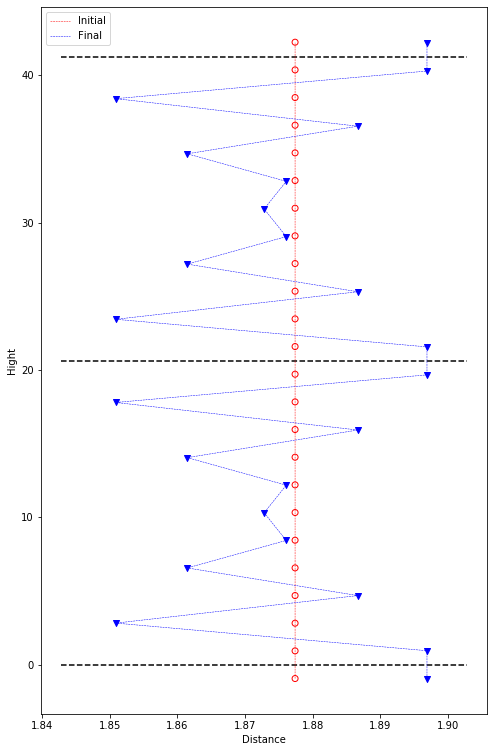

In [78]:
fig = twinboundary_analyzer.plot_plane_diff()

## def plot_angle_diff

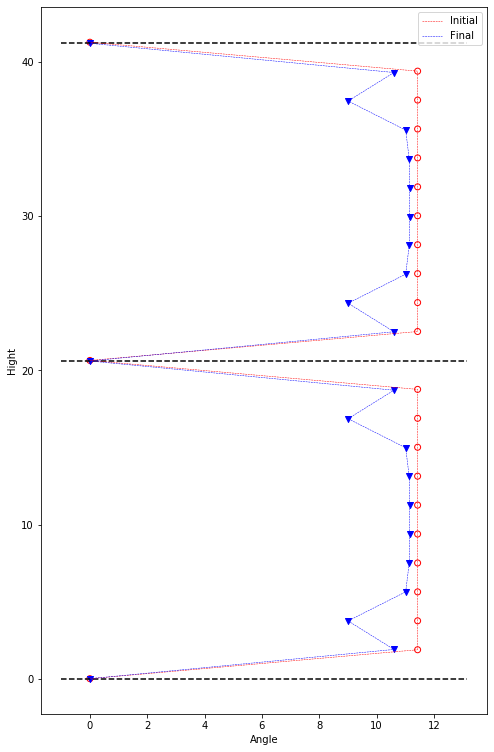

In [79]:
fig = twinboundary_analyzer.plot_angle_diff()

## def plot_atom_diff

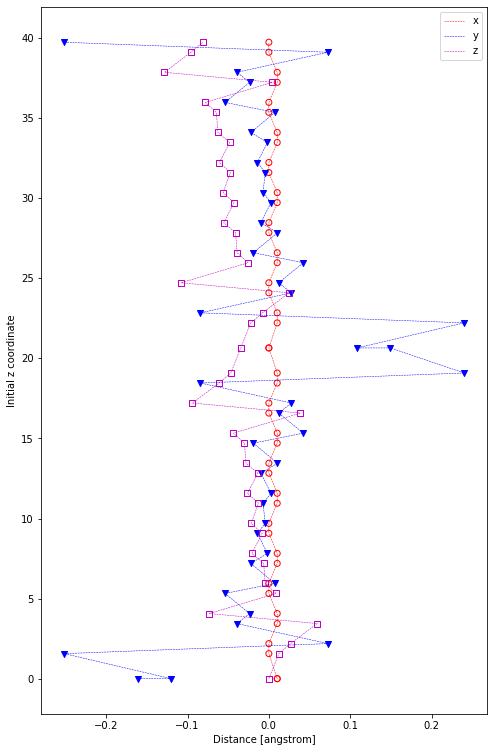

In [89]:
twinboundary_analyzer.plot_atom_diff()

In [115]:
from twinpy.lattice.lattice import Lattice
lattice = Lattice(original_cells[2][0])
angles = lattice.angles

In [116]:
np.testing.assert_allclose(angles[1:], [90., 90.])

In [67]:
# twinboundary_shear_analyzer.get_band_paths
from twinpy.plot.band_structure import get_labels_band_paths_from_seekpath
cell = twinboundary_shear_analyzer.phonon_analyzers[0].primitive_cell
# labels, band_paths = get_labels_band_paths_from_seekpath(cell)
# labels = ['S', 'Y', 'GAMMA']
labels = ['Y', 'GAMMA']
# band_paths = np.array([[[0.5, 0.5, 0.],
#                         [0., 0.5, 0.],
#                         [0., 0., 0.]]])
band_paths = np.array([[[0., 0.5, 0.],
                        [0., 0., 0.]]])
band_structures = twinboundary_shear_analyzer.get_band_structures(
    base_band_paths=band_paths,
    labels=labels,
    npoints=501,
    use_reciprocal_lattice=True)

In [69]:
cell_ = twinboundary_shear_analyzer.phonon_analyzers[0].primitive_cell
from twinpy.plot.band_structure import get_seekpath
skp = get_seekpath(cell_)
skp

{'point_coords': {'GAMMA': [0.0, 0.0, 0.0],
  'X': [0.5, 0.0, 0.0],
  'Z': [0.0, 0.0, 0.5],
  'U': [0.5, 0.0, 0.5],
  'Y': [0.0, 0.5, 0.0],
  'S': [0.5, 0.5, 0.0],
  'T': [0.0, 0.5, 0.5],
  'R': [0.5, 0.5, 0.5]},
 'path': [('GAMMA', 'X'),
  ('X', 'S'),
  ('S', 'Y'),
  ('Y', 'GAMMA'),
  ('GAMMA', 'Z'),
  ('Z', 'U'),
  ('U', 'R'),
  ('R', 'T'),
  ('T', 'Z'),
  ('X', 'U'),
  ('Y', 'T'),
  ('S', 'R')],
 'has_inversion_symmetry': True,
 'augmented_path': False,
 'bravais_lattice': 'oP',
 'bravais_lattice_extended': 'oP1',
 'conv_lattice': array([[ 3.19290368,  0.        ,  0.        ],
        [ 0.        , 41.23387672,  0.        ],
        [ 0.        ,  0.        ,  7.51521423]]),
 'conv_positions': array([[0.5       , 0.        , 0.34426046],
        [0.5       , 0.        , 0.75998246],
        [0.5       , 0.09686977, 0.86376849],
        [0.5       , 0.08491331, 0.27760883],
        [0.        , 0.05376716, 0.58406909],
        [0.        , 0.03823999, 0.03896119],
        [0.5      

(<Figure size 576x432 with 1 Axes>,
 [<matplotlib.axes._axes.Axes at 0x7f896991db10>])

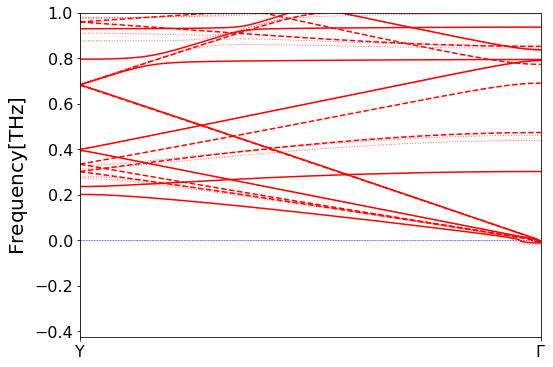

In [54]:
from twinpy.plot.band_structure import BandsPlot
bsp = BandsPlot(band_structures)

bsp.set_ylim(ymax=1)
bsp.plot_band_structures()

## def set_shear_phononsprimitive_cell

In [31]:
show_info(analyzer.set_shears)
shear_relaxes = [ AiidaRelaxWorkChain(load_node(pk))
                      for pk in twinboundary_shear_relax_pks ]
shear_phonons = [ AiidaPhonopyWorkChain(load_node(pk))
                      for pk in twinboundary_shear_phonon_pks ]
analyzer.set_shears(shear_relaxes=shear_relaxes,
                    shear_phonons=shear_phonons)
print("# shear relaxes")
pprint(analyzer.shear_relaxes)
print("")
print("# shear phonons")
pprint(analyzer.shear_phonons)

====== START method information ======

# ---------
# docstring
# ---------

        Set shear relaxes and corresponding shear phonons

        Args:
            shear_relaxes: list of AiidaRelaxWorkChain
            shear_phonons: list of AiidaPhonopyWorkChain
        

======= END method information =======


# shear relaxes

# shear phonons


In [5]:
analyzer.run_mesh(interval=0.04)
# tdms = analyzer.get_thermal_displacement_matrices()
tdms_orig_no_shift = analyzer.get_thermal_displacement_matrices(with_original_cart=True)

run mesh with [57 57 32] (hexagonal)
run mesh with [50  4 22] (twinboundary)


KeyboardInterrupt: 

In [ ]:
temp = [0, 50, 100, 150, 200, 250, 300]
header = os.path.join('/home', 'mizo', 'test', 'Mg_10-12_')
write_thermal_ellipsoid(
    cell=analyzer.twinboundary_structure.get_cell_for_export(),
    matrices=tdms_orig_no_shift[1],
    temperatures=temp,
    header=header)

In [379]:
analyzer.run_mesh(interval=0.35)
# tdms = analyzer.get_thermal_displacement_matrices()
tdms_orig = analyzer.get_thermal_displacement_matrices(with_original_cart=True)

run mesh with [65 65 36] offset (0.0, 0.0, 0.5) (hexagonal)
run mesh with [56  4 24] offset (0.5, 0.5, 0.5) (twinboundary)


In [346]:
# print(tdms_orig[0][5])
# print(tdms_orig[1][5])
tdms = analyzer.get_thermal_displacement_matrices(with_original_cart=False)

In [361]:
# rot = analyzer.hexagonal_to_original_rotation_matrix
# tdms[0].thermal_displacement_matrices.shape
# print(tdms_orig[0][5])
# print(tdms_orig[1][5])
# tdms_orig[0][6]
rot = analyzer.hexagonal_to_original_rotation_matrix
# tdms[0][6]
print(tdms[0][6])
# a = np.dot(rot, np.dot(tdms_orig[0][6,0], rot.T))
# np.dot(rot.T, np.dot(a, rot))
# tdms_orig[0][6, 0]

[[[ 1.50434791e-02 -2.75468256e-12  2.10503716e-13]
  [-2.75468256e-12  1.50434791e-02  5.04605639e-12]
  [ 2.10503716e-13  5.04605639e-12  1.10895303e-01]]

 [[ 1.50434791e-02  4.15138207e-11  2.10510598e-13]
  [ 4.15138207e-11  1.50434791e-02  5.04610955e-12]
  [ 2.10510598e-13  5.04610955e-12  1.10895303e-01]]]


In [11]:
print("# exagonal to original rotation matrix")
pprint(analyzer.hexagonal_to_original_rotation_matrix)
print("")
print("# twinboundary to original rotation matrix")
pprint(analyzer.twinboundary_to_original_rotation_matrix)

# exagonal to original rotation matrix
array([[ 0.5       , -0.8660254 ,  0.        ],
       [ 0.63228188,  0.36504811,  0.68334435],
       [-0.59179357, -0.34167217,  0.73009622]])

# twinboundary to original rotation matrix
array([[ 1.00000000e+00,  8.84117822e-17, -7.06153663e-10],
       [-7.06153663e-10, -6.24323039e-26, -1.00000000e+00],
       [-8.84117822e-17,  1.00000000e+00,  0.00000000e+00]])


In [12]:
t = 5
j, k = 2, 2
cell = analyzer.twinboundary_structure.get_cell_for_export()
y = list(cell[1][:,2])
x_s = tdms_orig_no_shift[1][t,:]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x_s[:,j,k], y)

# bulk_cell = analyzer.hexagonal_structure.get_cell_for_export()
bulk_y = [0.25, 0.75]
bulk_x_s = tdms_orig_no_shift[0][t,:]
ax.scatter(bulk_x_s[:,j,k], bulk_y, c='r')

NameError: name 'tdms_orig_no_shift' is not defined

In [13]:

write_thermal_ellipsoid(Oh)
tdms_orig_no_shift

NameError: name 'Oh' is not defined

In [14]:
print("# label")
print(aiida_twinboundary_relax.label)
print("")
print("# description")
print(aiida_twinboundary_relax.description)
print("")
print("# twinboundary relax settings")
pprint(aiida_twinboundary_relax.twinboundary_settings)
print("")
print("# get pks")
pprint(aiida_twinboundary_relax.get_pks())
print("")
print("# structure diff")
pprint(aiida_twinboundary_relax.get_diff().keys())
print("")

analyzer.hexagonal_to_original_rotation_matrix

# label


NameError: name 'aiida_twinboundary_relax' is not defined

## set additional relax

In [15]:
aiida_twinboundary_relax.set_additional_relax(twinboundary_relax_additional_relax_pk)
print("# get pks")
pprint(aiida_twinboundary_relax.get_pks())

NameError: name 'aiida_twinboundary_relax' is not defined

## get_planes_angles

In [33]:
pprint(aiida_twinboundary_relax.get_planes_angles(
    is_fractional=True,
    get_additional_relax=True))

{'angles': {'before': array([ 0.        , 11.43304902, 11.43304902, 11.43304902, 11.43304902,
       11.43304902, 11.43304902, 11.43304902, 11.43304902, 11.43304902,
       11.43304902,  0.        , 11.43304902, 11.43304902, 11.43304902,
       11.43304902, 11.43304902, 11.43304902, 11.43304902, 11.43304902,
       11.43304902, 11.43304902]),
            'relax': array([ 0.        , 10.6076032 ,  9.00754571, 11.01664803, 11.13948968,
       11.15799793, 11.15799793, 11.13948968, 11.01664803,  9.00754571,
       10.6076032 ,  0.        , 10.6076032 ,  9.00754571, 11.01664803,
       11.13948968, 11.15799793, 11.15799793, 11.13948968, 11.01664803,
        9.00754571, 10.6076032 ])},
 'planes': {'before': [0.0,
                       0.04545454995602156,
                       0.09090908998538572,
                       0.1363636399414073,
                       0.18181819013954245,
                       0.2272727200001356,
                       0.27272726995615715,
                    

## get_distances

In [34]:
pprint(aiida_twinboundary_relax.get_distances(
    is_fractional=True,
    get_additional_relax=True))

{'before': [0.04545454995602156,
            0.04545454002936416,
            0.04545454995602158,
            0.04545455019813516,
            0.045454529860593146,
            0.04545454995602155,
            0.04545454995602155,
            0.045454540029364165,
            0.04545455019813516,
            0.045454549956021606,
            0.04545454002936411,
            0.04545453978725056,
            0.04545455019813516,
            0.045454549956021606,
            0.04545454002936411,
            0.045454549956021606,
            0.045454549956021606,
            0.045454530102706614,
            0.045454549956021606,
            0.04545454995602172,
            0.045454540029364,
            0.04545454994800768],
 'relax': [0.04600357499443968,
           0.044887965120733876,
           0.04575543485303413,
           0.04514417508303595,
           0.04549897485360674,
           0.045419750190299396,
           0.04549897485360671,
           0.045144175083035976,
        

## plane diff

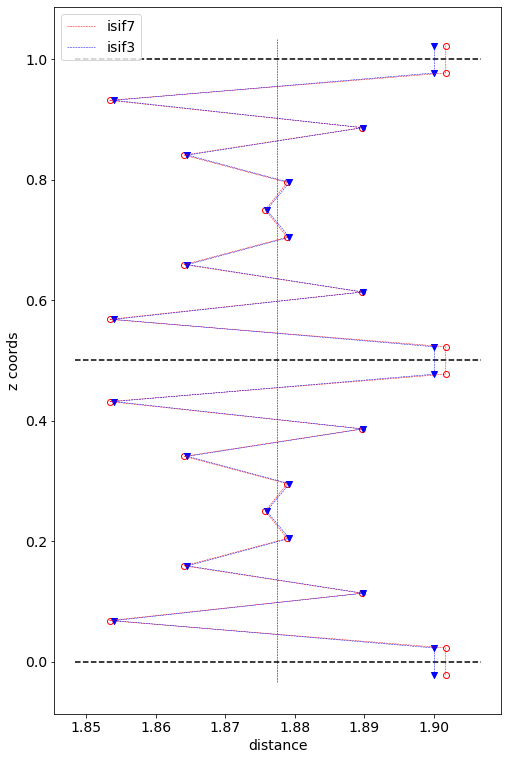

In [36]:
aiida_twinboundary_relax.plot_plane_diff(
           is_fractional=True,
           is_decorate=True)

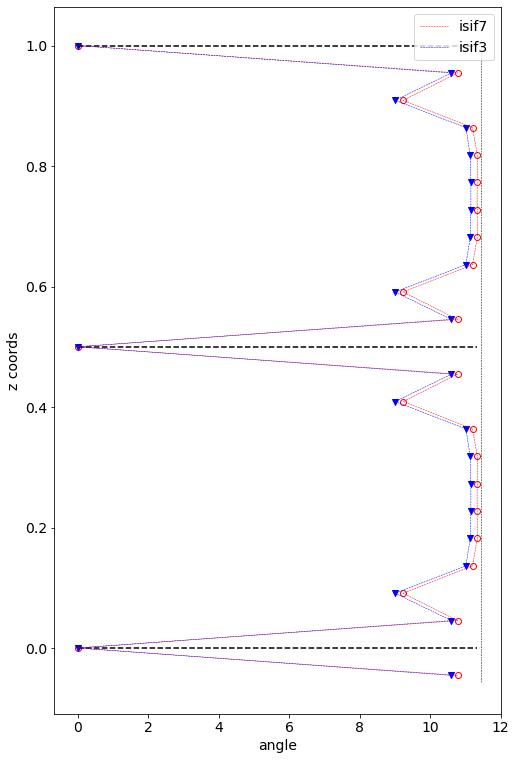

In [37]:
aiida_twinboundary_relax.plot_angle_diff(
           is_fractional=True,
           is_decorate=True)

## formation energy

In [40]:
aiida_twinboundary_relax.get_formation_energy(bulk_relax_pk=bulk_relax_pk)

139.1241761281626